<a href="https://colab.research.google.com/github/Neelov12/MAT-421-Computational-Methods-Integrated-into-Python/blob/main/Module_E_3_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module E: Section 3.2 and 3.3

## 3.2: Continuity and Differentiation

In this section, I will write a python script that that tests the continuity of a function based on the following definition:

Let $f : D → ℝ$ be a real-valued function on $D ⊆ ℝ^d$. Then $f$ is said to be continuous at $a ∈ D$ if

$$
lim_{x→a} f(x) = f (a).
$$
(Sourced from class textbook)

First, execute all necessary imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create two functions that return the limit of a function and another that returns the points in which the function is discontinuous

In [23]:
def limit(f, a, h=1e-6):
    """Approximates the left-hand and right-hand limits of f at x = a."""
    left_limit = f(a - h)
    right_limit = f(a + h)
    return left_limit, right_limit

def is_continuous(f, x_values):
    """Checks continuity of f at each x in x_values."""
    discontinuities = []
    for a in x_values:
        try:
            f_a = f(a)
            left_limit, right_limit = limit(f, a)
            if not (np.isclose(left_limit, right_limit)and np.isclose(left_limit, f_a)):
                discontinuities.append(a)
        except Exception:
            discontinuities.append(a)
    return discontinuities

Next, I will run the functions above against the following function:

$$
f(x) = x^2 [x < 1]
$$
$$
f(x)= 2x [x ≥ 1]
$$

In [24]:
# Example function
def example_function(x):
    return np.piecewise(x, [x < 1, x >= 1], [lambda x: x**2, lambda x: 2*x])

# Define range of x values
domain = np.linspace(-2, 3, 1000)

discontinuous_points = is_continuous(example_function, domain)

# Print discontinuous points
if discontinuous_points:
    print("Discontinuities detected at:", discontinuous_points)
else:
    print("The function is continuous on the given domain.")

Discontinuities detected at: [-0.3933933933933933, -0.3883883883883883, -0.3833833833833833, -0.3783783783783783, -0.3733733733733733, -0.3683683683683683, -0.3633633633633633, -0.3583583583583583, -0.35335335335335327, -0.34834834834834827, -0.34334334334334327, -0.33833833833833826, -0.33333333333333326, -0.32832832832832826, -0.32332332332332325, -0.31831831831831825, -0.31331331331331325, -0.30830830830830824, -0.30330330330330324, -0.29829829829829824, -0.29329329329329323, -0.28828828828828823, -0.2832832832832832, -0.2782782782782782, -0.2732732732732732, -0.2682682682682682, -0.2632632632632632, -0.2582582582582582, -0.2532532532532532, -0.2482482482482482, -0.2432432432432432, -0.2382382382382382, -0.2332332332332332, -0.2282282282282282, -0.2232232232232232, -0.21821821821821819, -0.21321321321321318, -0.20820820820820818, -0.20320320320320318, -0.19819819819819817, -0.19319319319319317, -0.18818818818818817, -0.18318318318318316, -0.17817817817817816, -0.17317317317317316, -

Plot of function

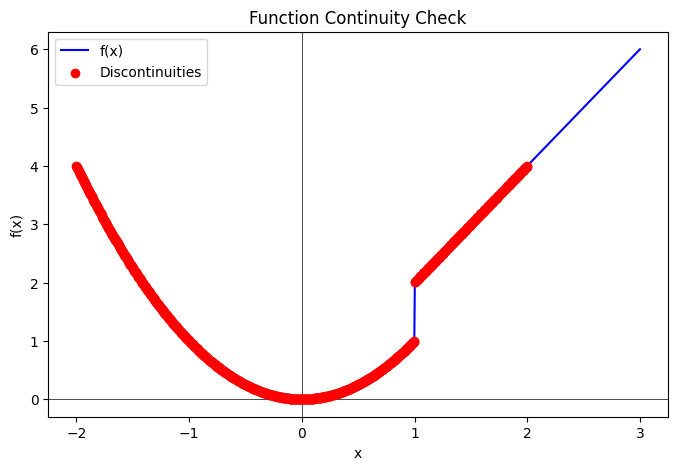

In [5]:
# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(domain, example_function(domain), label="f(x)", color='blue')
plt.scatter(discontinuous_points, example_function(np.array(discontinuous_points)), color='red', label="Discontinuities", zorder=3)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Function Continuity Check")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

While the function is discontinuous, the code above finds discontinuous points where there are none due to the nature of float numbers and its bitwise notation, highlighting a limitation of calculus based programs on python

## 3.2.3: Taylor's Theorum

In this section I will write a python program that demonstrates the concept of Taylor's Theorum

Taylor's Theorum outputs polynomial approximations to a function around a particular point:

Let $f : D → ℝ$ be a real-valued function on $D ⊆ ℝ^d$. Suppose $f$ has a $m$
times continuous derivative on $[a, b]$. Then

$$
f (b) = f (a) + (b − a) f ′(a) + \frac{1}{2} (b − a)^2 f ′′(a) + ... + \frac{(b-a)^{m-1}}{(m-1)!}f^{(m-1)}(a) + R_m
$$

where $R_m = \frac{(b-a)^m}{(m)!}f^{(m)}(a +
θ (b − a))$ for some $0 <
θ < 1$


(Sourced from class textbook)

Run the necessary import

In [25]:
import sympy as sp

Function that returns Taylor series

In [26]:
def taylor_series(f, x0, n):
    """Computes the Taylor series expansion of f at x0 up to n terms."""
    x = sp.Symbol('x')
    f_sym = f(x)
    series = f_sym.series(x, x0, n+1).removeO()
    return series

Run function against $f(x) = e^x$

In [27]:
# Example function
def example_function(x):
    return sp.exp(x)

# Define parameters
x0 = 0  # Point of expansion
n_terms = 5  # Number of terms in Taylor series

# Compute Taylor series
x = sp.Symbol('x')
taylor_expansion = taylor_series(example_function, x0, n_terms)

# Convert to numerical function
taylor_func = sp.lambdify(x, taylor_expansion, 'numpy')

Plot of the results

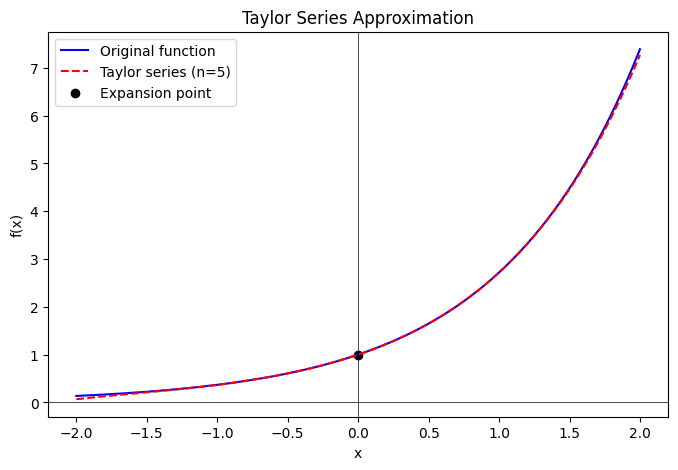

Taylor Series Expansion at x=0:
x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


In [28]:
# Plot original function and Taylor series approximation
x_vals = np.linspace(-2, 2, 400)
y_original = np.exp(x_vals)  # Change accordingly if function is changed
y_taylor = taylor_func(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_original, label="Original function", color='blue')
plt.plot(x_vals, y_taylor, label=f"Taylor series (n={n_terms})", linestyle='dashed', color='red')
plt.scatter([x0], [np.exp(x0)], color='black', label="Expansion point")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Taylor Series Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

print(f"Taylor Series Expansion at x={x0}:")
print(taylor_expansion)
